In [1]:
# pip install lets_plot

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from itertools import cycle

from pandas_datareader import data as pdr

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [4]:
from sklearn.linear_model import LinearRegression # Least Squares

from sklearn.svm import SVR # Support Vector Machine

from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors

# Regularization (Penalized Regressors) --> Linear

from sklearn.linear_model import ElasticNet # Elastic Net Penalty
from sklearn.linear_model import Lasso # LASSO

# Decision Tree with Ensemble --> Non-linear

from sklearn.tree import DecisionTreeRegressor # Decision Tree

## Bagging (Bootstrapped-AGGregation) --> intelligent architecture like Homo Sapiens

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting (more recent approaches) --> Homo Sapiens Sapiens

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
from lets_plot import *
LetsPlot.setup_html()

### Download data (all constituents and S&P500)

- affinity propagation
- t-stochastic neighborhood embedding (t-sne)
- principal component analysis (PCA)

In [10]:
list_of_tickers = pd.read_html("https://stockanalysis.com/list/sp-500-stocks/")[0].iloc[ : , 1:]

list_of_tickers



,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue
0,NVDA,NVIDIA Corporation,4.47T,183.83,-1.48%,165.22B
1,AAPL,Apple Inc.,3.98T,269.24,0.67%,416.16B
2,MSFT,Microsoft Corporation,3.71T,499.37,-1.60%,293.81B
3,GOOGL,Alphabet Inc.,3.45T,285.74,0.25%,385.48B
4,GOOG,Alphabet Inc.,3.44T,286.38,0.27%,385.48B
...,...,...,...,...,...,...
497,LKQ,LKQ Corporation,7.66B,29.92,0.10%,14.10B
498,MTCH,"Match Group, Inc.",7.44B,31.51,-0.22%,3.47B
499,MOH,"Molina Healthcare, Inc.",6.98B,135.77,-0.75%,42.84B
500,SOLS,"Solstice Advanced Materials, Inc.",6.54B,41.23,-0.84%,3.81B


In [11]:
tickers = list_of_tickers["Symbol"].tolist()
tickers

['NVDA',
 'AAPL',
 'MSFT',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AVGO',
 'META',
 'TSLA',
 'BRK.B',
 'LLY',
 'WMT',
 'JPM',
 'ORCL',
 'V',
 'XOM',
 'JNJ',
 'MA',
 'NFLX',
 'ABBV',
 'COST',
 'PLTR',
 'AMD',
 'BAC',
 'HD',
 'PG',
 'GE',
 'CVX',
 'CSCO',
 'KO',
 'UNH',
 'IBM',
 'MU',
 'WFC',
 'CAT',
 'MS',
 'GS',
 'TMUS',
 'PM',
 'RTX',
 'MRK',
 'AXP',
 'ABT',
 'CRM',
 'MCD',
 'TMO',
 'PEP',
 'LIN',
 'ISRG',
 'UBER',
 'DIS',
 'LRCX',
 'AMGN',
 'INTU',
 'APP',
 'T',
 'AMAT',
 'NEE',
 'QCOM',
 'C',
 'VZ',
 'NOW',
 'BX',
 'BLK',
 'SCHW',
 'INTC',
 'APH',
 'TJX',
 'ANET',
 'GEV',
 'BKNG',
 'GILD',
 'DHR',
 'BSX',
 'ACN',
 'SPGI',
 'KLAC',
 'BA',
 'PFE',
 'TXN',
 'SYK',
 'PANW',
 'ADBE',
 'WELL',
 'PGR',
 'ETN',
 'CRWD',
 'UNP',
 'MDT',
 'DE',
 'COF',
 'LOW',
 'HON',
 'PLD',
 'CB',
 'ADI',
 'VRTX',
 'LMT',
 'COP',
 'HCA',
 'CEG',
 'MCK',
 'HOOD',
 'PH',
 'ADP',
 'KKR',
 'CME',
 'SO',
 'CMCSA',
 'CVS',
 'MO',
 'DUK',
 'BMY',
 'NEM',
 'SBUX',
 'GD',
 'NKE',
 'TT',
 'DASH',
 'MMC',
 'MMM',
 'ICE',
 'AMT'

In [214]:
benchmark = tickers + ["SPY"]

In [215]:
start_date = "2006-11-01"
end_date = "2025-11-12"

In [216]:
prices =\
(
    yf.download(benchmark,
               start = start_date,
               end = end_date,
               auto_adjust = True,
               interval = "1d"
            )
    # .dropna()
    # ["Close"]
)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-11-01 -> 2025-11-12)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [217]:
prices

Price      Adj Close             Close                                      \
Ticker          BF.B BRK.B           A        AAPL        ABBV        ABNB   
Date                                                                         
2006-11-01       NaN   NaN   21.664766    2.374091         NaN         NaN   
2006-11-02       NaN   NaN   21.232615    2.368692         NaN         NaN   
2006-11-03       NaN   NaN   20.927567    2.347998         NaN         NaN   
2006-11-06       NaN   NaN   21.626640    2.390586         NaN         NaN   
2006-11-07       NaN   NaN   21.372435    2.414578         NaN         NaN   
...              ...   ...         ...         ...         ...         ...   
2025-11-05       NaN   NaN  146.770004  269.878387  216.770004  122.500000   
2025-11-06       NaN   NaN  147.490005  269.508728  219.039993  120.529999   
2025-11-07       NaN   NaN  146.740005  268.209991  219.160004  120.879997   
2025-11-10       NaN   NaN  146.360001  269.429993  218.710007  120.199997   
2025-11-11       NaN   NaN  149.419998  275.250000  225.169998  122.529999   

Price                                                      ...   Volume  \
Ticker             ABT       ACGL         ACN        ADBE  ...       WY   
Date                                                       ...            
2006-11-01   14.763538   6.749267   23.590084   37.759998  ...   851200   
2006-11-02   14.776001   6.878166   23.840441   37.660000  ...  1035700   
2006-11-03   14.832033   7.015518   23.668760   37.750000  ...  1121800   
2006-11-06   14.779106   7.073628   24.105089   38.540001  ...  1667600   
2006-11-07   14.900531   7.115891   23.675915   39.610001  ...  1504300   
...                ...        ...         ...         ...  ...      ...   
2025-11-05  124.540001  87.550003  247.820007  335.529999  ...  7422500   
2025-11-06  124.949997  87.760002  241.339996  327.350006  ...  6740000   
2025-11-07  126.360001  89.570000  245.759995  326.950012  ...  6547900   
2025-11-10  125.889999  89.790001  244.550003  328.850006  ...  7552400   
2025-11-11  127.000000  90.660004  242.559998  333.220001  ...  3797500   

Price                                                                   \
Ticker         WYNN      XEL       XOM        XYL         XYZ      YUM   
Date                                                                     
2006-11-01   794300  1147700  18329900        NaN         NaN  4395560   
2006-11-02  1091900  1577800  20154500        NaN         NaN  3625502   
2006-11-03   875300  1311800  25491100        NaN         NaN  4086758   
2006-11-06  1886200  1122800  17201800        NaN         NaN  2983973   
2006-11-07  1873100  1027300  20127000        NaN         NaN  2425069   
...             ...      ...       ...        ...         ...      ...   
2025-11-05  1775500  6708200  12400900   898500.0   5310800.0  3277200   
2025-11-06  2895800  5096100  14219700   888200.0  11236400.0  2713100   
2025-11-07  3206100  4770100  17181100  1020800.0  21402400.0  2415500   
2025-11-10  2400000  5354100  13048000   947600.0   8017400.0  2142100   
2025-11-11  1566600  4506100  16077100   789500.0   5397400.0  1609800   

Price                                    
Ticker          ZBH     ZBRA        ZTS  
Date                                     
2006-11-01  1203864   810100        NaN  
2006-11-02  1312941   651100        NaN  
2006-11-03  1544897   447600        NaN  
2006-11-06  1822276   389600        NaN  
2006-11-07  1385144   340100        NaN  
...             ...      ...        ...  
2025-11-05  9199800  1083800  8355300.0  
2025-11-06  4482700   530000  7260900.0  
2025-11-07  2628200   777800  5808800.0  
2025-11-10  3073800   658100  4828400.0  
2025-11-11  2018100   482100  5574800.0  

[4787 rows x 2517 columns]

In [218]:
prices =\
(
    prices.xs('Close', axis=1, level=0)
)
prices

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2006-11-01,21.664766,2.374091,NaN,NaN,14.763538,6.749267,23.590084,37.759998,20.067251,22.763685,...,12.167167,38.989265,11.086800,36.543419,NaN,NaN,14.850142,62.042068,36.830002,NaN
2006-11-02,21.232615,2.368692,NaN,NaN,14.776001,6.878166,23.840441,37.660000,20.016563,22.172985,...,12.207625,38.994629,11.001480,36.610291,NaN,NaN,14.820188,62.456860,35.930000,NaN
2006-11-03,20.927567,2.347998,NaN,NaN,14.832033,7.015518,23.668760,37.750000,19.782116,21.283833,...,12.130569,39.391548,11.011520,37.103985,NaN,NaN,14.483191,62.923458,35.730000,NaN
2006-11-06,21.626640,2.390586,NaN,NaN,14.779106,7.073628,24.105089,38.540001,20.168627,21.277607,...,12.213404,40.362404,11.021550,37.494820,NaN,NaN,14.742801,64.617104,35.799999,NaN
2006-11-07,21.372435,2.414578,NaN,NaN,14.900531,7.115891,23.675915,39.610001,20.548817,20.848579,...,12.145978,40.153217,10.991437,37.299400,NaN,NaN,14.825174,64.556595,35.990002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-05,146.770004,269.878387,216.770004,122.500000,124.540001,87.550003,247.820007,335.529999,236.000000,56.290001,...,22.480000,124.930771,81.190002,112.694313,150.679993,73.650002,149.389999,87.550003,266.269989,120.489998
2025-11-06,147.490005,269.508728,219.039993,120.529999,124.949997,87.760002,241.339996,327.350006,232.880005,56.720001,...,22.830000,122.286255,80.540001,113.507202,150.339996,70.930000,147.610001,88.510002,258.239990,119.559998
2025-11-07,146.740005,268.209991,219.160004,120.879997,126.360001,89.570000,245.759995,326.950012,228.479996,56.980000,...,23.080000,125.878799,80.910004,116.203613,151.309998,65.449997,149.119995,88.500000,259.540009,120.239998


In [20]:
prices.describe()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
count,4787.000000,4787.000000,3236.000000,1236.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,...,4787.000000,4787.000000,4787.000000,4787.000000,3541.000000,2509.000000,4787.000000,4787.000000,4787.000000,3215.000000
mean,62.798110,63.884150,85.453318,138.074187,54.599177,30.538376,135.789821,202.351694,81.165118,36.553454,...,20.387643,91.734361,34.316335,58.820651,68.169085,80.917712,65.233056,90.631210,153.297361,105.632536
std,45.079601,71.883607,52.348332,24.289540,37.978372,25.746805,108.050807,191.360087,65.408607,17.594732,...,7.538441,35.324495,20.162241,22.335954,37.068646,63.297158,41.121199,31.129394,143.349141,59.257685
min,7.905826,2.345298,20.059416,82.489998,13.804337,4.765058,19.584421,15.980000,10.674158,9.766376,...,4.108169,9.247419,8.902112,24.145130,19.160784,8.370000,11.518278,27.763403,16.450001,25.896320
25%,24.504550,11.206452,42.141584,121.065001,18.973034,10.627876,42.704538,38.580000,26.987232,21.879701,...,13.939684,68.750992,15.166104,45.050034,32.164471,47.669998,29.426035,61.108852,37.965000,44.481150
50%,39.515217,26.549618,68.072777,135.335007,37.083519,22.859602,97.446121,95.320000,50.976093,33.065266,...,20.835402,89.073044,30.204788,53.125221,65.569199,66.400002,52.366001,97.882751,83.489998,104.490761
75%,108.830063,122.944386,129.316620,152.284996,96.045841,38.031187,238.900719,361.739990,135.325180,45.087103,...,26.324081,110.673485,54.787882,59.690536,99.154335,82.419998,101.260124,113.236771,257.244995,161.465630
max,174.067673,275.250000,242.630859,216.839996,138.334625,109.220207,394.312805,688.369995,254.623001,89.422707,...,37.470196,207.099930,81.849998,119.946037,152.949997,281.809998,160.955307,167.155396,614.549988,237.474976


In [219]:
spy_price =\
(
    prices['SPY']
)
spy_price

Date
2006-11-01     95.973579
2006-11-02     95.917503
2006-11-03     95.749199
2006-11-06     96.829170
2006-11-07     97.200783
                 ...    
2025-11-05    677.580017
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
Name: SPY, Length: 4787, dtype: float64

In [220]:
forex_ticker = ["DEXJPUS", "DEXUSUK"]
forex_data =\
(
    pdr
    .get_data_fred(forex_ticker,
                   start = start_date,
                   end = end_date)
)
forex_data

,DEXJPUS,DEXUSUK
DATE,,
2006-11-01,117.01,1.9091
2006-11-02,117.12,1.9088
2006-11-03,118.06,1.9011
2006-11-06,118.40,1.8967
2006-11-07,117.44,1.9098
...,...,...
2025-11-06,152.97,1.3107
2025-11-07,153.06,1.3165
2025-11-10,153.99,1.3157


In [221]:
index_ticker = ["VIXCLS"]
index_data =\
(
    pdr
    .get_data_fred(index_ticker,
                   start = start_date,
                   end = end_date)
)
index_data

,VIXCLS
DATE,
2006-11-01,11.51
2006-11-02,11.42
2006-11-03,11.16
2006-11-06,11.16
2006-11-07,11.09
...,...
2025-11-06,19.50
2025-11-07,19.08
2025-11-10,17.60


## Y variable - S&P weekly

In [222]:
#data wrangle
return_period = 5

In [223]:
spy_price

Date
2006-11-01     95.973579
2006-11-02     95.917503
2006-11-03     95.749199
2006-11-06     96.829170
2006-11-07     97.200783
                 ...    
2025-11-05    677.580017
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
Name: SPY, Length: 4787, dtype: float64

In [224]:
spy_weekly =\
(
    np.log(spy_price)
    .diff(return_period)
    .shift(-return_period)
)
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003614
2006-11-07    0.007261
                ...   
2025-11-05         NaN
2025-11-06         NaN
2025-11-07         NaN
2025-11-10         NaN
2025-11-11         NaN
Name: SPY, Length: 4787, dtype: float64

In [225]:
spy_weekly.name

'SPY'

In [226]:
spy_weekly.name =\
(
    spy_weekly
    .name
    + 
    "_pred"
)

In [227]:
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003614
2006-11-07    0.007261
                ...   
2025-11-05         NaN
2025-11-06         NaN
2025-11-07         NaN
2025-11-10         NaN
2025-11-11         NaN
Name: SPY_pred, Length: 4787, dtype: float64

## X variables setup

In [228]:
def compute_x_var(ticker_name):
    ###Currency exchange rates###
    x1_forex =\
    (
        np
        .log(forex_data)
        .diff(return_period)
    )
     
    ####Index data###
    x2_index =\
    (
        np
        .log(index_data)
        .diff(return_period)
    )
    
    ###lagged 5,15,30,60 returns of s&p index###
    x3_lagged =\
    pd.concat(
        [np
        .log(spy_price
            )
        .diff(i) for i in [return_period,
                           return_period * 3, # 15
                           return_period * 6, # 30
                           return_period * 12 # 60
                          ]
        ],
        axis = 1
    ).dropna()
        
    cols = [f"{ticker_name}_{t}" for t in ["DT", "3DT", "6DT", "12DT"]]
    x3_lagged.columns = cols
    
    ###21, 63, 252 MA of stock###
    x4_ma =\
    pd.concat(
        [(spy_price
        )
        .rolling(window = i) 
         .mean() for i in [21,
                           63,
                           252
                            ]
        ],
        axis =1
    ).dropna()
    
    macols = [f"{ticker_name}_MA_{t}" for t in ["21", "63", "252"]]
    x4_ma.columns = macols

    ### 10, 30, 200 EMA of stock ###
    x5_ema =\
    pd.concat(
        [(spy_price
        )
        .ewm(span = i, adjust= False) 
         .mean() for i in [10,
                           30,
                           200
                                      ]
        ],
        axis =1
    ).dropna()
        
    emacols = [f"{ticker_name}_EMA_{t}" for t in ["10", "30", "200"]]
    x5_ema.columns = emacols

    X =\
    (
        pd
        .concat([x1_forex, 
                 x2_index, 
                 x3_lagged, 
                 x4_ma, 
                 x5_ema
                ],
                axis = 1)
    )
    return X

In [229]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973579,95.973579,95.973579
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963384,95.969962,95.973021
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924441,95.955719,95.970794
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088937,96.012071,95.979335
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291091,96.088762,95.991489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,-0.007814,-0.003047,0.142509,-0.014103,0.014531,0.018459,0.041429,672.719046,659.263508,604.438746,676.950233,670.954578,619.155732
2025-11-07,-0.006447,0.001825,0.089874,-0.016393,0.009855,0.013731,0.042320,672.709999,659.847765,604.840321,675.862912,670.955571,619.671297
2025-11-10,-0.000909,0.000532,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227223,676.876929,671.631986,620.285911
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602398,677.990214,672.365406,620.909932


In [230]:
data =\
(
    pd
    .concat([spy_weekly, X],
            axis = 1)
    .dropna()
)
data

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,-0.025958,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003510,0.012710,109.807358,106.911715,103.875343,109.197490,108.933149,105.208132
2007-11-02,-0.040905,0.006383,0.014806,0.162442,-0.015878,-0.033365,-0.005079,0.043917,109.711427,106.976127,103.923125,108.982422,108.873889,105.236058
2007-11-05,-0.043241,-0.001309,0.009177,0.201677,-0.026828,-0.032520,-0.010870,0.040970,109.514124,107.009894,103.967869,108.657096,108.765453,105.255531
2007-11-06,-0.026588,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004481,0.050755,109.413770,107.043316,104.019008,108.653278,108.757107,105.289168
2007-11-07,-0.001624,-0.017326,0.012816,0.357376,-0.044560,-0.041971,-0.028526,0.038422,109.122234,107.079675,104.054068,108.109828,108.557572,105.292901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-29,-0.014374,0.000790,-0.009694,-0.094665,0.028913,0.020993,0.044674,0.093178,670.450471,654.569071,601.828726,677.207461,667.652136,615.516842
2025-10-30,-0.014103,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774
2025-10-31,-0.016393,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527
2025-11-03,-0.002784,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492


## data split train/test

In [231]:
Y =\
(
    data
    .loc[ : , spy_weekly.name]
)

Y

2007-11-01   -0.025958
2007-11-02   -0.040905
2007-11-05   -0.043241
2007-11-06   -0.026588
2007-11-07   -0.001624
                ...   
2025-10-29   -0.014374
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
Name: SPY_pred, Length: 4291, dtype: float64

In [232]:
Y

2007-11-01   -0.025958
2007-11-02   -0.040905
2007-11-05   -0.043241
2007-11-06   -0.026588
2007-11-07   -0.001624
                ...   
2025-10-29   -0.014374
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
Name: SPY_pred, Length: 4291, dtype: float64

In [233]:
X =\
(
    data
    .loc[ : , X.columns]
)

In [203]:
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,0.006813,0.016125,0.091998,-0.005349,-0.028975,-0.003510,0.012710,109.807367,106.911717,103.875343,109.197501,108.933156,105.208139
2007-11-02,0.006383,0.014806,0.162442,-0.015879,-0.033366,-0.005080,0.043916,109.711434,106.976128,103.923124,108.982422,108.873892,105.236063
2007-11-05,-0.001309,0.009177,0.201677,-0.026828,-0.032521,-0.010871,0.040969,109.514125,107.009894,103.967869,108.657084,108.765451,105.255536
2007-11-06,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004482,0.050755,109.413770,107.043315,104.019007,108.653269,108.757106,105.289173
2007-11-07,-0.017326,0.012816,0.357376,-0.044561,-0.041971,-0.028526,0.038422,109.122236,107.079675,104.054067,108.109818,108.557570,105.292906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-29,0.000790,-0.009694,-0.094665,0.028913,0.020993,0.044674,0.093178,670.450471,654.569071,601.828725,677.207461,667.652136,615.516841
2025-10-30,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249267,677.684290,668.437805,616.156773
2025-10-31,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674973,678.479873,669.316656,616.812526
2025-11-03,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112659,679.363537,670.221390,617.474492


In [234]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!

In [235]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set)
                )
train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [236]:
train_size

3218

In [237]:
len(Y) == len(X) # cross-validate the data

True

In [238]:
Y_train, Y_test =\
(
    Y[0         : train_size],
    Y[train_size:len(Y)     ]
)

In [239]:
X_train, X_test =\
(
    X[0         : train_size],
    X[train_size:len(X)     ]
)

In [240]:
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [241]:
#set metrics
seed = 2025
num_folds = 10

metric = "neg_mean_squared_error" 

## Modelling Phase 1) Vanilla Model
- In this case, we use supervised learning to predict the price of SPY and assess performance
- Firstly, we set up the models

In [45]:
models = []

In [46]:
(
    models
    .append(
        ("LR", LinearRegression()
         )
           )
)
(
    models
    .append(
        ("Elastic Net Penalty", ElasticNet()
         )
           )
)
(
    models
    .append(
        ("LASSO", Lasso()
         )
           )
)
(
    models
    .append(
        ("Support Vector Machine", SVR()
         )
           )
)
(
    models
    .append(
        ("K-Nearest Neighbors", KNeighborsRegressor()
         )
           )
)
(
    models
    .append(
        ("Decision Tree", DecisionTreeRegressor()
         )
           )
)
(
    models
    .append(
        ("Extra Trees Algo", ExtraTreesRegressor()
         )
           )
)
(
    models
    .append(
        ("Random Forest", RandomForestRegressor()
         )
           )
)
(
    models
    .append(
        ("Gradient Boosting", GradientBoostingRegressor()
         )
           )
)

(
    models
    .append(
        ("Adaptive Boosting", AdaBoostRegressor()
         )
           )
)

In [47]:
models

[('LR', LinearRegression()),
 ('Elastic Net Penalty', ElasticNet()),
 ('LASSO', Lasso()),
 ('Support Vector Machine', SVR()),
 ('K-Nearest Neighbors', KNeighborsRegressor()),
 ('Decision Tree', DecisionTreeRegressor()),
 ('Extra Trees Algo', ExtraTreesRegressor()),
 ('Random Forest', RandomForestRegressor()),
 ('Gradient Boosting', GradientBoostingRegressor()),
 ('Adaptive Boosting', AdaBoostRegressor())]

In [48]:
# Let's build empty lists to store performance across many algorithms

names = []

train_results = []
test_results = []

kfold_results = []

In [49]:
for name, model in models:

    names.append(name)

    # set k-fold cross-validation (here, 10)

    kfold =\
    (
        KFold(n_splits = num_folds,
              random_state = seed,
              shuffle = True)
    )

    # run cross-validation

    cv_results =\
    (
        -1
        *
        cross_val_score(model, X_train, Y_train,
                        cv = kfold,
                        scoring = metric)
    )

    # Cross-validation results should be contained in objects

    kfold_results.append(cv_results)

    # Training Set Model Fitting

    res = model.fit(X_train, Y_train)

    # Assess the performance in Training Set

    train_result = mean_squared_error(res.predict(X_train), Y_train)

    train_results.append(train_result)

    # Assess the performance in Testing Set

    test_result = mean_squared_error(res.predict(X_test), Y_test)

    test_results.append(test_result)    

    user_interface_message = "%s: %f (%f) %f %f " % (name, 
                                                     cv_results.mean(), 
                                                     cv_results.std(), 
                                                     train_result, 
                                                     test_result)

    print(user_interface_message)

LR: 0.000695 (0.000190) 0.000682 0.000563 
Elastic Net Penalty: 0.000696 (0.000186) 0.000696 0.000532 
LASSO: 0.000696 (0.000186) 0.000696 0.000532 
Support Vector Machine: 0.001891 (0.000193) 0.001871 0.004849 
K-Nearest Neighbors: 0.000315 (0.000062) 0.000164 0.000571 
Decision Tree: 0.000749 (0.000182) 0.000000 0.002848 
Extra Trees Algo: 0.000292 (0.000084) 0.000000 0.000818 
Random Forest: 0.000402 (0.000104) 0.000054 0.000698 
Gradient Boosting: 0.000526 (0.000115) 0.000367 0.000649 
Adaptive Boosting: 0.000978 (0.000129) 0.000789 0.000750 


In [51]:
df_for_comparison =\
(
    pd
    .DataFrame(
        {"Algorithms": names * 2,
         "Data": ["Training Set"] * len(names) + ["Testing Set"] * len(names),
         "Performance": train_results + test_results
         }
    )
)
df_for_comparison

,Algorithms,Data,Performance
0,LR,Training Set,6.816953e-04
1,Elastic Net Penalty,Training Set,6.959054e-04
2,LASSO,Training Set,6.959054e-04
3,Support Vector Machine,Training Set,1.870745e-03
4,K-Nearest Neighbors,Training Set,1.635432e-04
5,Decision Tree,Training Set,0.000000e+00
6,Extra Trees Algo,Training Set,7.184233e-34
7,Random Forest,Training Set,5.383764e-05
8,Gradient Boosting,Training Set,3.665496e-04
9,Adaptive Boosting,Training Set,7.888679e-04


In [55]:
performance_comparison =\
(
    ggplot(df_for_comparison,
           aes(x = "Algorithms",
               y = "Performance",
               fill = "Data"
              )
          )
    + geom_bar(stat = "identity",
               position = "dodge",
               width = 0.5)
    + labs(title = "Comparing the Performance of Machine Learning Algorithms on the Training vs. Testing Set",
           y = "Mean Squared Error (MSE)",
           x = "Name of ML Algorithms",
           caption = "Source: Federal Reserve Bank & Yahoo Finance")
    + theme(legend_position = "top")
    + ggsize(1000, 500)
)

performance_comparison.show()
##red > blue underfitting
## blue > red overfitting
## blue line is what we care about

> Based on the results, we shortlist 3 models:
- Linear Regression
- Adaptive Boosting
- kNN

## kNN

In [255]:
knearest = None

for name, model in models:
    if name == "K-Nearest Neighbors":
        knearest = model
        break
knearest.fit(X_train, Y_train)

y_pred_train_knn = knearest.predict(X_train)
y_pred_test_knn = knearest.predict(X_test)



## Linear Regression

In [256]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


## Adaptive Boosting

In [257]:
adaptive_boosting = None

for name, model in models:
    if name == "Adaptive Boosting":
        adaptive_boosting = model
        break
adaptive_boosting.fit(X_train, Y_train)

y_pred_train_ab = adaptive_boosting.predict(X_train)
y_pred_test_ab = adaptive_boosting.predict(X_test)


In [258]:
def simple_momentum_strategy(predictions, actual_returns, lookback=10):
    """
    Simple momentum: Go long if recent predictions are improving
    """
    # pred_series = pd.Series(predictions, index=actual_returns.index)
    vol_window = 5
    vol_threshold = 0.02
    df = pd.DataFrame(index=actual_returns.index)
    df["pred"] = pd.Series(predictions, index=actual_returns.index)
    df["actual_returns"] = actual_returns

    # Compute SMAs
    df['sma3'] = df['pred'].rolling(3).mean()
    df['sma7'] = df['pred'].rolling(7).mean()

    
    # Momentum signal: current prediction vs rolling average
    # pred_momentum = pred_series > pred_series.rolling(lookback).mean()

    # Generate signals using crossovers
    threshold = 0.001
    # df['signal'] = np.where(df['sma3'] > df['sma7'], 1, -1)
    df['signal'] = np.where(df['sma3'] - df['sma7'] > threshold, 1,
                            np.where(df['sma7'] - df['sma3'] > threshold, -1 , 0)) 
     # Compute rolling volatility of actual returns
    # df['vol'] = actual_returns.rolling(vol_window).std()

    # # Apply volatility filter: zero out positions if vol too high
    # df.loc[df['vol'] > vol_threshold, 'signal'] = 0

    df['strategy_returns'] = df['signal'].shift(1) * actual_returns
    # df['strategy_returns'] = df['signal'].shift(2) * df['actual_returns']
    # Go long if momentum positive, short if negative
    # positions = np.where(pred_momentum, 1, -1)
    
    # strategy_returns = pd.Series(positions * actual_returns.values, 
    #                             index=actual_returns.index)
    
    return df['strategy_returns'].dropna()



In [259]:
def calculate_metrics(ts_returns, periods_per_year = 252, starting_capital = 100_000, is_log_return = False):
    if is_log_return:
        equity = np.exp(ts_returns.cumsum())
    else:
        equity = (ts_returns + 1).cumprod()
    # equity = ts_returns.add(1).cumprod()
    equity_dollars = equity * starting_capital
    years =\
    (
        equity.index[-1]
        -
        equity.index[0]
    ).days / 365.25

    n_years = ts_returns.shape[0] / periods_per_year
    # Annualized return
    if is_log_return:
        # For log returns, cumulative growth = exp(sum(log_returns))
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    else:
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    # annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
    #                             ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    if isinstance(annualized_vol, (int, float, np.floating)):
    # scalar case
        annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
    else:
        # pandas Series case
        annualized_vol_safe = annualized_vol.replace(0, np.nan)

    annualized_sharpe = annualized_return / annualized_vol_safe

    cagr = equity.iloc[-1] ** (1 / years) - 1

    max_dd =\
    (
        (equity - equity.cummax()
        )
        /
        equity.cummax()
    ).min()
    
    # Extract final account value as a scalar, not a Series
    final_account_value = equity_dollars.iloc[-1].values if hasattr(equity_dollars.iloc[-1], 'values') else equity_dollars.iloc[-1]

    return pd.DataFrame({
        "CAGR": [cagr * 100],
        "Sharpe": [annualized_sharpe],  # Keep as raw number, not percentage
        "Max_Drawdown": [max_dd],
        "Final_Account_Value": [final_account_value]  # Keep as dollar amount
    }
    ).round(2)

In [260]:
print("Number of weekly periods:", bh_test.shape[0])

Number of weekly periods: 249


In [261]:
def compute_and_compare(train_momentum, test_momentum, bh_train, bh_test):

    # Calculate metrics for your momentum strategy
    strategy_metrics_train = calculate_metrics(train_momentum.dropna(), periods_per_year=52, is_log_return= False)
    strategy_metrics_test = calculate_metrics(test_momentum.dropna(), periods_per_year=52, is_log_return = False)

    print("Momentum Strategy Performance:")
    print("Training Set:")
    print(strategy_metrics_train)
    print("\nTesting Set:")
    print(strategy_metrics_test)

    # Calculate buy-and-hold metrics
    bh_train_result = calculate_metrics(bh_train, periods_per_year=52, is_log_return = True)
    bh_test_result = calculate_metrics(bh_test, periods_per_year=52, is_log_return= True)

    print("\nBuy-and-Hold Performance:")
    print("Training Set:")
    print(bh_train_result)
    print("\nTesting Set:")
    print(bh_test_result)

    # Detailed comparison
    print("\n" + "="*50)
    print("PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold")
    print("="*50)

    print(f"\nSHARPE RATIO:")
    print(f"Train - Momentum: {strategy_metrics_train['Sharpe'].iloc[0]:.3f} vs BH: {bh_train_result['Sharpe'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Sharpe'].iloc[0]:.3f} vs BH: {bh_test_result['Sharpe'].iloc[0]:.3f}")

    print(f"\nCAGR (Annualized Return):")
    print(f"Train - Momentum: {strategy_metrics_train['CAGR'].iloc[0]:.3f} vs BH: {bh_train_result['CAGR'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['CAGR'].iloc[0]:.3f} vs BH: {bh_test_result['CAGR'].iloc[0]:.3f}")

    print(f"\nMAX DRAWDOWN:")
    print(f"Train - Momentum: {strategy_metrics_train['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_train_result['Max_Drawdown'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_test_result['Max_Drawdown'].iloc[0]:.3f}")

    print(f"\nFINAL ACCOUNT VALUE ($):")
    print(f"Train - Momentum: ${strategy_metrics_train['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_train_result['Final_Account_Value'].iloc[0]:,.2f}")
    print(f"Test  - Momentum: ${strategy_metrics_test['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_test_result['Final_Account_Value'].iloc[0]:,.2f}")

    # Calculate outperformance
    sharpe_outperformance = strategy_metrics_test['Sharpe'].iloc[0] - bh_test_result['Sharpe'].iloc[0]
    cagr_outperformance = strategy_metrics_test['CAGR'].iloc[0] - bh_test_result['CAGR'].iloc[0]

    print(f"\nOUTPERFORMANCE (Test Set):")
    print(f"Sharpe Ratio: {sharpe_outperformance:+.3f}")
    print(f"CAGR: {cagr_outperformance:+.3f}")

## kNN Model Results

In [262]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_knn, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_knn, Y_test)
# strategy_metrics_train = calculate_metrics(train_momentum['strategy_returns'].dropna(), periods_per_year=52)
# strategy_metrics_test = calculate_metrics(test_momentum['strategy_returns'].dropna(), periods_per_year=52)

lasso_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)

Momentum Strategy Performance:
Training Set:
     CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  942.85    3.91         -0.27         5.648384e+18

Testing Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  4.14    0.37         -0.06             120018.6

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.81    0.51         -0.55            379102.44

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  14.22    0.87         -0.24            188160.72

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 3.910 vs BH: 0.510
Test  - Momentum: 0.370 vs BH: 0.870

CAGR (Annualized Return):
Train - Momentum: 942.850 vs BH: 9.810
Test  - Momentum: 4.140 vs BH: 14.220

MAX DRAWDOWN:
Train - Momentum: -0.270 vs BH: -0.550
Test  - Momentum: -0.060 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $5,648,383,971,401,576,448.00 vs BH: $379,102.44
Test  - Momentum: $120,018.60 vs BH: $188,1

## Linear Regression

In [263]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  4.07    0.06         -0.62            171294.21

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  44.86     0.6         -0.44            529170.72

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.81    0.51         -0.55            379102.44

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  14.22    0.87         -0.24            188160.72

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.060 vs BH: 0.510
Test  - Momentum: 0.600 vs BH: 0.870

CAGR (Annualized Return):
Train - Momentum: 4.070 vs BH: 9.810
Test  - Momentum: 44.860 vs BH: 14.220

MAX DRAWDOWN:
Train - Momentum: -0.620 vs BH: -0.550
Test  - Momentum: -0.440 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $171,294.21 vs BH: $379,102.44
Test  - Momentum: $529,170.72 vs BH: $188,160.72

OUTPERFORMANCE

In [264]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  4.07    0.06         -0.62            171294.21

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  44.86     0.6         -0.44            529170.72

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.81    0.51         -0.55            379102.44

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  14.22    0.87         -0.24            188160.72

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.060 vs BH: 0.510
Test  - Momentum: 0.600 vs BH: 0.870

CAGR (Annualized Return):
Train - Momentum: 4.070 vs BH: 9.810
Test  - Momentum: 44.860 vs BH: 14.220

MAX DRAWDOWN:
Train - Momentum: -0.620 vs BH: -0.550
Test  - Momentum: -0.440 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $171,294.21 vs BH: $379,102.44
Test  - Momentum: $529,170.72 vs BH: $188,160.72

OUTPERFORMANCE

## Adaptive Boosting

In [265]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_ab, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_ab, Y_test)
adaptive_boosting_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)



Momentum Strategy Performance:
Training Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  56.72    0.65         -0.54          43193364.15

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  20.61    0.32         -0.42            232158.63

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.81    0.51         -0.55            379102.44

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  14.22    0.87         -0.24            188160.72

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.650 vs BH: 0.510
Test  - Momentum: 0.320 vs BH: 0.870

CAGR (Annualized Return):
Train - Momentum: 56.720 vs BH: 9.810
Test  - Momentum: 20.610 vs BH: 14.220

MAX DRAWDOWN:
Train - Momentum: -0.540 vs BH: -0.550
Test  - Momentum: -0.420 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $43,193,364.15 vs BH: $379,102.44
Test  - Momentum: $232,158.63 vs BH: $188,160.72

OUTPERFO

## Phase 2: Enhancing the models by integrating Affinity Propagation and PCA
- we strive to build features and pluck them back into the winner linear regression

In [76]:
missing_fractions = \
    prices \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

In [77]:
missing_fractions.head(10)
#no missing as we choose a more recent timeframe

Ticker
BF.B     1.000000
BRK.B    1.000000
Q        0.997493
SOLS     0.996449
GEV      0.914560
SOLV     0.914351
VLTO     0.889492
KVUE     0.867558
GEHC     0.847713
CEG      0.799875
dtype: float64

## Set up PCA

In [78]:
drop_list =\
(
    sorted(list(missing_fractions[missing_fractions > 0.30]
                .index)
          )
)

df_pca =\
(
    prices
    .drop(labels = drop_list,
          axis = 1)
)
df_pca.shape[1]


444

In [79]:
df_pca['SPY']

Date
2006-11-01     95.973633
2006-11-02     95.917503
2006-11-03     95.749222
2006-11-06     96.829147
2006-11-07     97.200836
                 ...    
2025-11-05    677.580017
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
Name: SPY, Length: 4787, dtype: float64

In [80]:
df_pca =\
(
    df_pca
    .fillna(method = "ffill")
)

df_pca =\
(
    df_pca
    .dropna(axis = 0)
)

df_pca.shape

C:\Users\coool\AppData\Local\Temp\ipykernel_15904\4107408549.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pca


(3362, 444)

In [81]:
tickers_no_spy = [c for c in df_pca.columns if c != "SPY"]
print(len(tickers_no_spy))

443


In [82]:
Daily_Linear_Return =\
(
    df_pca
    .pct_change(1)
)

Daily_Linear_Return.shape[0]

3362

In [83]:
# Operational defition of outliers = data points beyond 3 SD

# Daily_Linear_Return =\
# (
#     Daily_Linear_Return[Daily_Linear_Return 
#                         .apply(lambda x:(x - x.mean()
#                                         ).abs() < (3 * x.std()
#                                                   )
#                               )
#                         .all(1)
#     ]
# )
Daily_Linear_Return_clipped = Daily_Linear_Return.clip(
    lower = Daily_Linear_Return.mean() - 3 * Daily_Linear_Return.std(),
    upper = Daily_Linear_Return.mean() + 3 * Daily_Linear_Return.std(),
    axis = 1 
)
Daily_Linear_Return.shape[0]

3362

In [84]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [85]:
scaled_dfprices =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_dfprices.describe()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
count,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,...,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03,3.361000e+03
mean,-1.796969e-17,-1.902673e-17,-1.374153e-17,-5.813724e-18,-5.285203e-18,4.228163e-18,-2.404768e-17,4.756683e-18,-1.057041e-18,7.399285e-18,...,-2.642602e-18,2.457620e-17,-1.162745e-17,-1.162745e-17,2.642602e-18,-4.228163e-18,1.479857e-17,-2.114081e-18,-6.342244e-18,-1.057041e-18
std,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-6.659879e+00,-7.228733e+00,-6.962222e+00,-1.093270e+01,-6.809227e+00,-8.455316e+00,-8.767230e+00,-1.490012e+01,-1.096889e+01,-7.310893e+00,...,-1.952343e+01,-6.611868e+00,-1.216910e+01,-8.512571e+00,-1.003473e+01,-7.605884e+00,-7.344012e+00,-1.263983e+01,-9.219765e+00,-1.007533e+01
25%,-5.085680e-01,-4.672597e-01,-4.780398e-01,-4.179249e-01,-4.645268e-01,-4.289988e-01,-4.800565e-01,-4.737688e-01,-4.253490e-01,-4.639032e-01,...,-4.417148e-01,-4.437941e-01,-4.831211e-01,-4.712580e-01,-4.984759e-01,-4.803433e-01,-4.856851e-01,-4.506798e-01,-4.549523e-01,-4.599362e-01
50%,8.755332e-03,-4.219636e-03,-5.773654e-04,1.819608e-02,3.237880e-02,1.140867e-02,6.778096e-03,2.616115e-02,2.294667e-02,6.608517e-03,...,-1.134126e-02,1.555174e-02,1.711003e-02,-2.313049e-02,1.324626e-02,-9.989664e-03,1.554819e-03,1.448157e-02,2.684602e-05,1.850620e-03
75%,5.460693e-01,5.114566e-01,5.263105e-01,4.549677e-01,4.920405e-01,4.857429e-01,4.845699e-01,5.222854e-01,4.969461e-01,4.975365e-01,...,4.429689e-01,4.592981e-01,4.798181e-01,4.336478e-01,5.474503e-01,4.841993e-01,5.072300e-01,4.593835e-01,4.837281e-01,4.542450e-01
max,5.874578e+00,8.493491e+00,7.691005e+00,9.862264e+00,8.413535e+00,8.829573e+00,9.612911e+00,6.284908e+00,8.402400e+00,7.385454e+00,...,1.156286e+01,1.072793e+01,1.355019e+01,9.604487e+00,8.823120e+00,7.844296e+00,7.509616e+00,1.552325e+01,9.448806e+00,7.209429e+00


### Affinity Propagation setup

In [86]:
df_stocks = df_pca[tickers_no_spy]
df_stocks

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,25.060341,17.514767,23.784880,12.580387,47.257996,32.369999,28.071087,20.379644,36.335033,34.990002,...,23.420179,76.361305,13.679353,76.352531,18.379688,49.897144,21.134529,35.924133,55.932159,34.360001
2012-07-02,24.849583,17.770294,23.843904,12.672308,47.572578,32.189999,27.750652,20.048271,36.400322,34.509998,...,23.642822,76.947266,13.667110,75.196777,18.586710,49.763020,21.025372,35.662025,56.045151,33.709999
2012-07-03,25.251932,17.976933,23.917692,12.808603,48.044445,32.509998,27.780460,20.013748,36.557003,34.700001,...,23.647463,77.010040,13.868995,74.755066,18.580242,50.311146,21.562761,35.238220,56.218971,34.139999
2012-07-05,25.143354,18.292738,23.888174,12.675477,47.399551,32.529999,27.892235,19.675472,36.863811,34.650002,...,23.401617,78.077301,13.660994,74.953842,18.528479,49.897144,21.436811,36.108150,55.436825,34.330002
2012-07-06,24.249262,18.170975,23.888174,12.539183,45.960346,31.370001,27.288633,19.599525,36.184895,32.310001,...,23.281019,77.763359,13.636525,74.122009,18.496140,49.448132,21.159721,36.202965,54.506924,33.880001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-05,146.770004,269.878387,124.540001,87.550003,247.820007,335.529999,236.000000,56.290001,259.570007,300.959991,...,283.315155,323.059998,22.480000,124.930771,81.190002,112.694313,150.679993,149.389999,87.550003,266.269989
2025-11-06,147.490005,269.508728,124.949997,87.760002,241.339996,327.350006,232.880005,56.720001,252.360001,294.859985,...,275.121643,322.200012,22.830000,122.286255,80.540001,113.507202,150.339996,147.610001,88.510002,258.239990
2025-11-07,146.740005,268.209991,126.360001,89.570000,245.759995,326.950012,228.479996,56.980000,254.160004,297.179993,...,270.825073,326.049988,23.080000,125.878799,80.910004,116.203613,151.309998,149.119995,88.500000,259.540009


In [87]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    df_stocks
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [88]:
returns["Volatility"] =\
(    
    df_stocks
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [89]:
returns

,Returns,Volatility
Ticker,,
A,0.168843,0.264112
AAPL,0.247148,0.284708
ABT,0.150882,0.224520
ACGL,0.178561,0.246097
ACN,0.151828,0.241489
...,...,...
XOM,0.097792,0.255996
XYL,0.181068,0.261568
YUM,0.135663,0.237230


In [90]:
# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [91]:
data.ndim

2

In [92]:
scaler = StandardScaler().fit(data)

In [93]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
Ticker,,
A,-0.090065,-0.433107
AAPL,0.921515,-0.161302
ABT,-0.322090,-0.955590
ACGL,0.035481,-0.670850
ACN,-0.309870,-0.731659


In [94]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
Ticker,,
A,-0.090065,-0.433107
AAPL,0.921515,-0.161302
ABT,-0.322090,-0.955590
ACGL,0.035481,-0.670850
ACN,-0.309870,-0.731659


## 1) Clustering Algo: kmeans

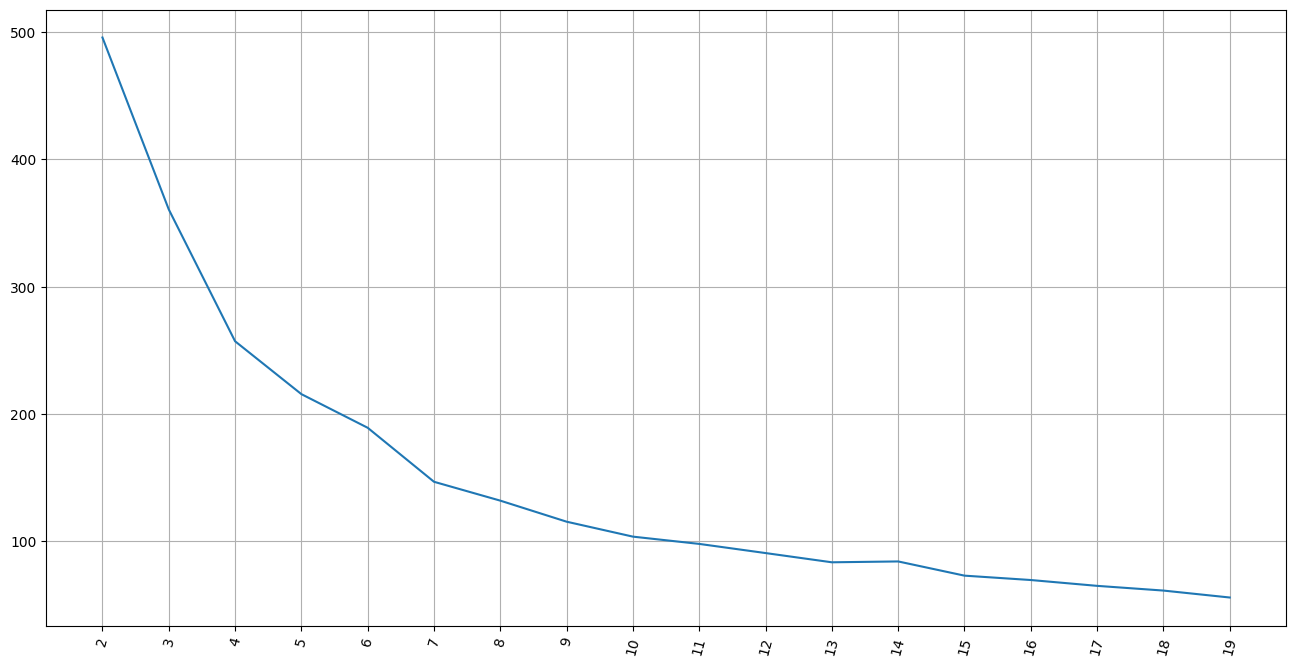

In [95]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), 
         distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

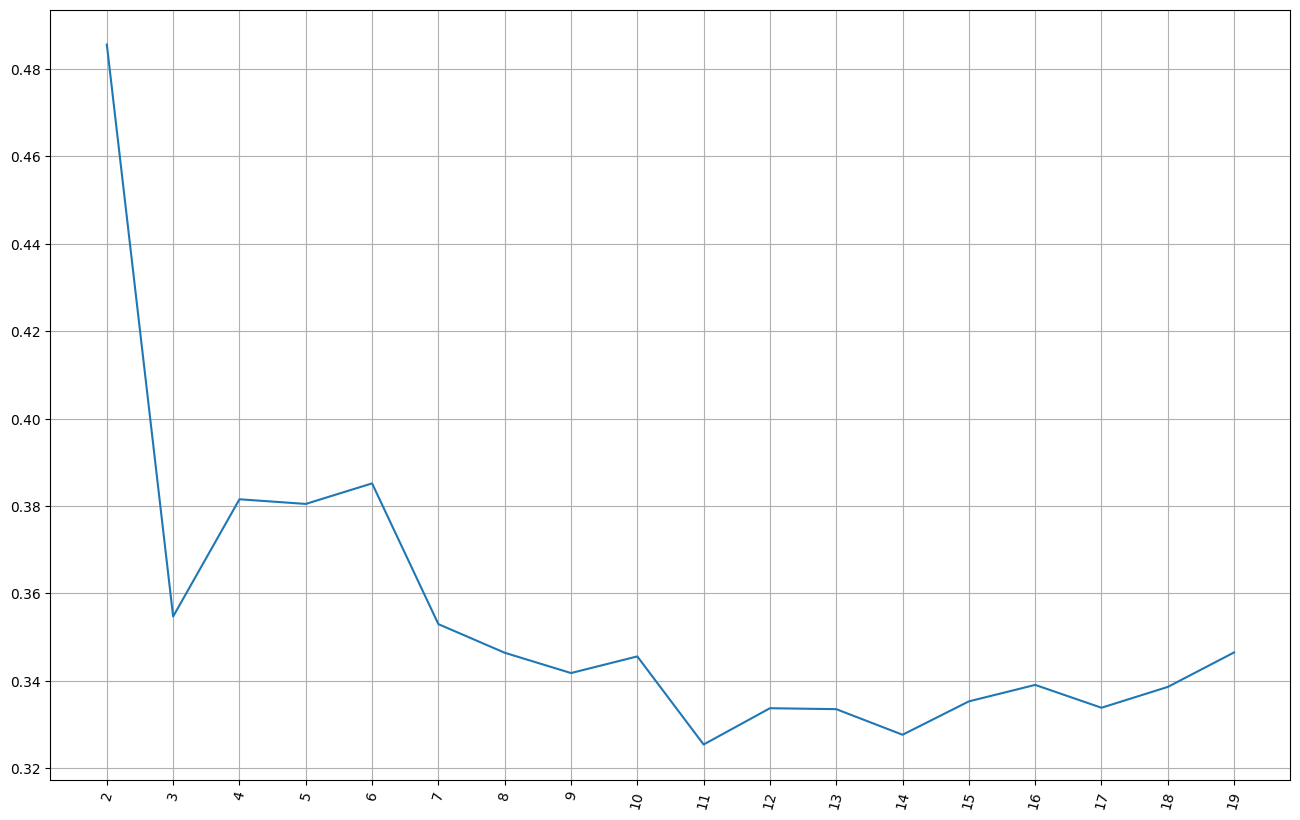

In [200]:
from sklearn import metrics
silhouette_score = []

for k in range(2, max_loop): #starts from k=2, there's no silouhette metric given for k =1 
        kmeans = KMeans(n_clusters = k,  
                        random_state = 627, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state = 627)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

In [96]:
nclust = 3

In [97]:
# Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [98]:
# Extracting labels 

target_labels = k_means.predict(X)

C:\Users\coool\AppData\Local\Temp\ipykernel_15904\3401718675.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "sg" (-> color='g'). The keyword argument will take precedence.
  plt.plot(centroids[:,0],


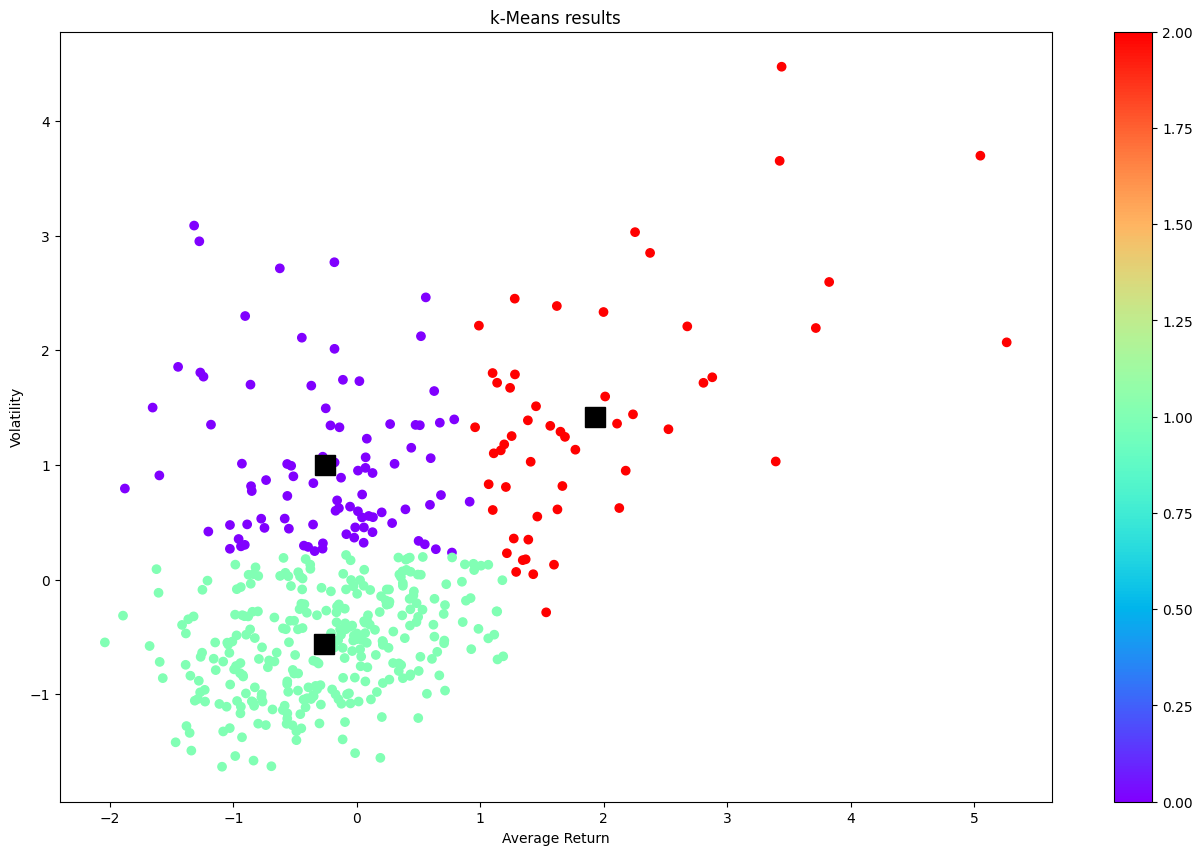

In [99]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter =\
(    
    ax
    .scatter(X.iloc[ : ,0], 
             X.iloc[ : ,1], 
             c = k_means.labels_, 
             cmap = "rainbow", 
             label = X.index)
)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], 
         centroids[:,1], 
         "sg", 
         markersize = 15, 
         color = "black")

In [100]:
# show number of stocks in each cluster

clustered_series =\
(
    pd
    .Series(index = X.index, 
            data = k_means
                   .labels_
                   .flatten()
            )
)

In [101]:
# clustered stock with its cluster label
clustered_series_all =\
(    
    pd
    .Series(index=X.index, 
            data=k_means.labels_.flatten()
            )
)

clustered_series = clustered_series[clustered_series != -1]

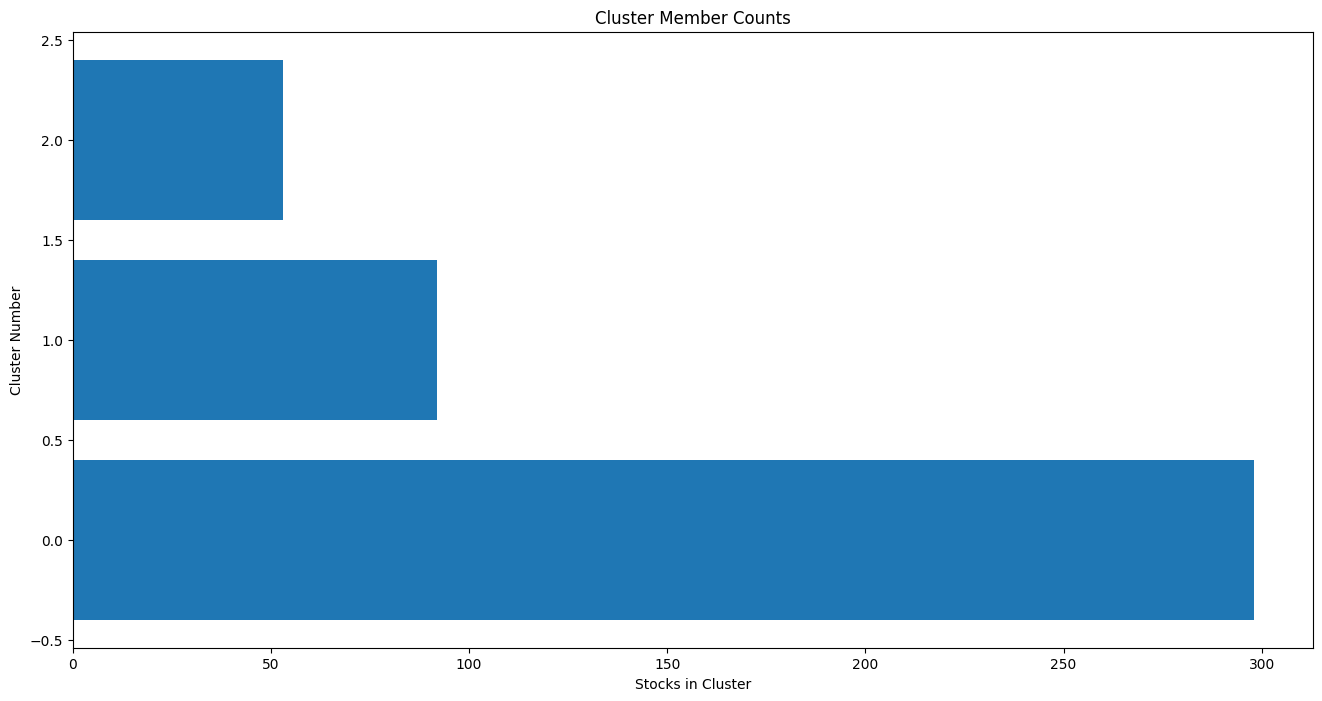

In [102]:
plt.figure(figsize=(16,8)
          )

plt.barh(
    range(len(clustered_series.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

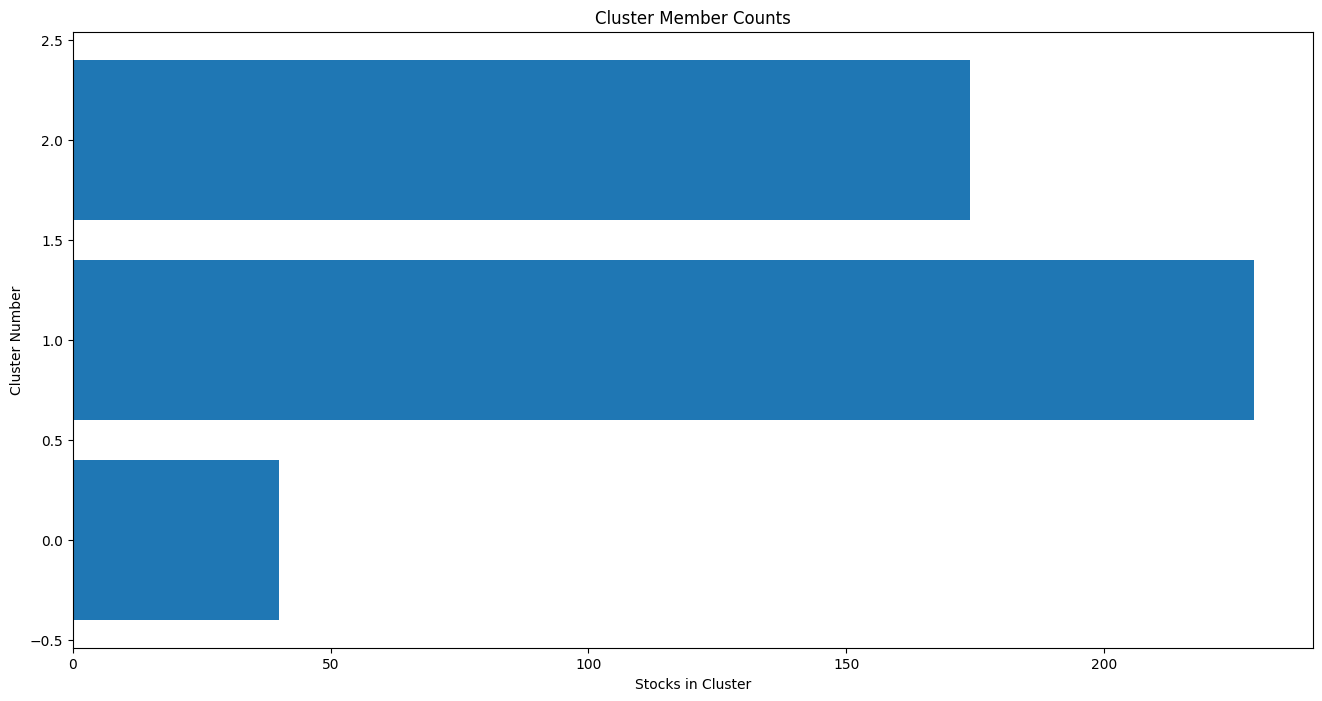

In [245]:
plt.figure(figsize=(16,8)
          )

counts =\
(    
    clustered_series
    .value_counts()
    .sort_index()
)

plt.barh(counts.index, 
         counts)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

## 2) Hierarchical Clustering (Agglomerative Clustering)

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [104]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")
Z[0]

array([1.79000000e+02, 1.80000000e+02, 5.66048215e-03, 2.00000000e+00])

In [105]:
Z.ndim

2

In [106]:
pd.DataFrame(Z)

,0,1,2,3
0,179.0,180.0,0.005660,2.0
1,421.0,426.0,0.005758,2.0
2,194.0,226.0,0.009406,2.0
3,40.0,379.0,0.010232,2.0
4,153.0,203.0,0.011949,2.0
...,...,...,...,...
437,873.0,877.0,8.780330,201.0
438,869.0,876.0,9.420388,43.0
439,874.0,880.0,14.519297,291.0
440,879.0,882.0,18.168702,400.0


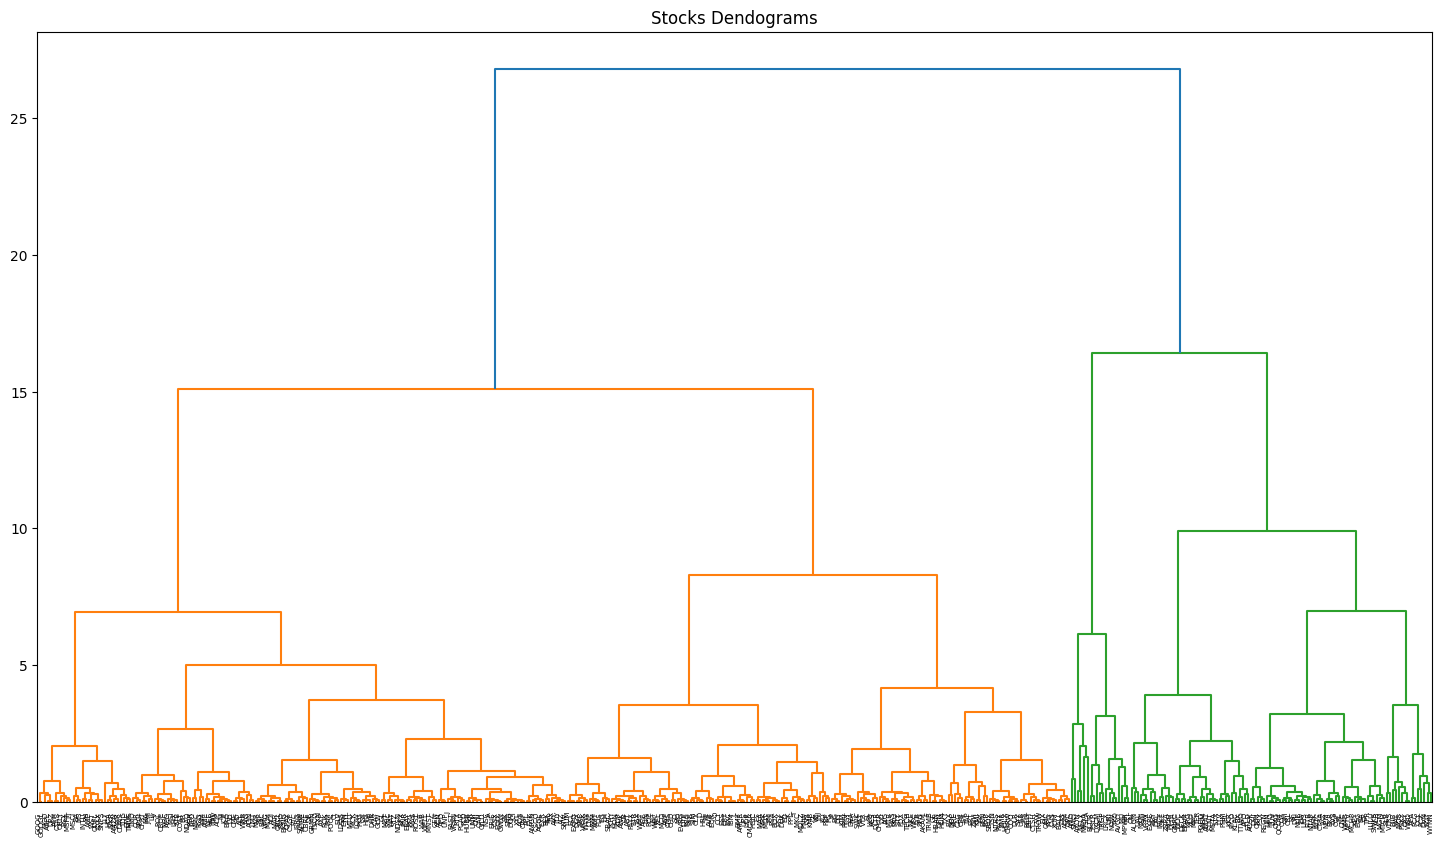

In [212]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

Clustering and Visualization

In [107]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
#                              affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

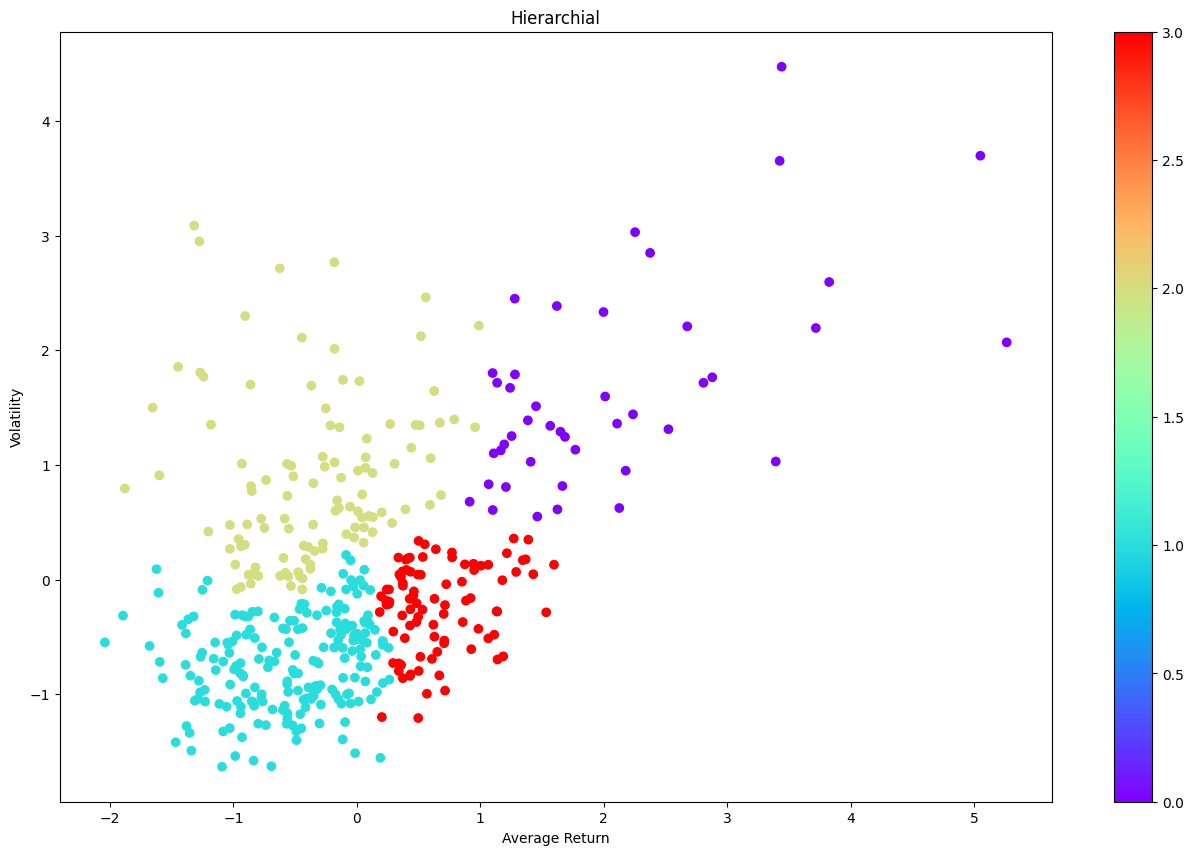

In [108]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels1, 
                     cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

## 3) Affinity Propagation

In [109]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

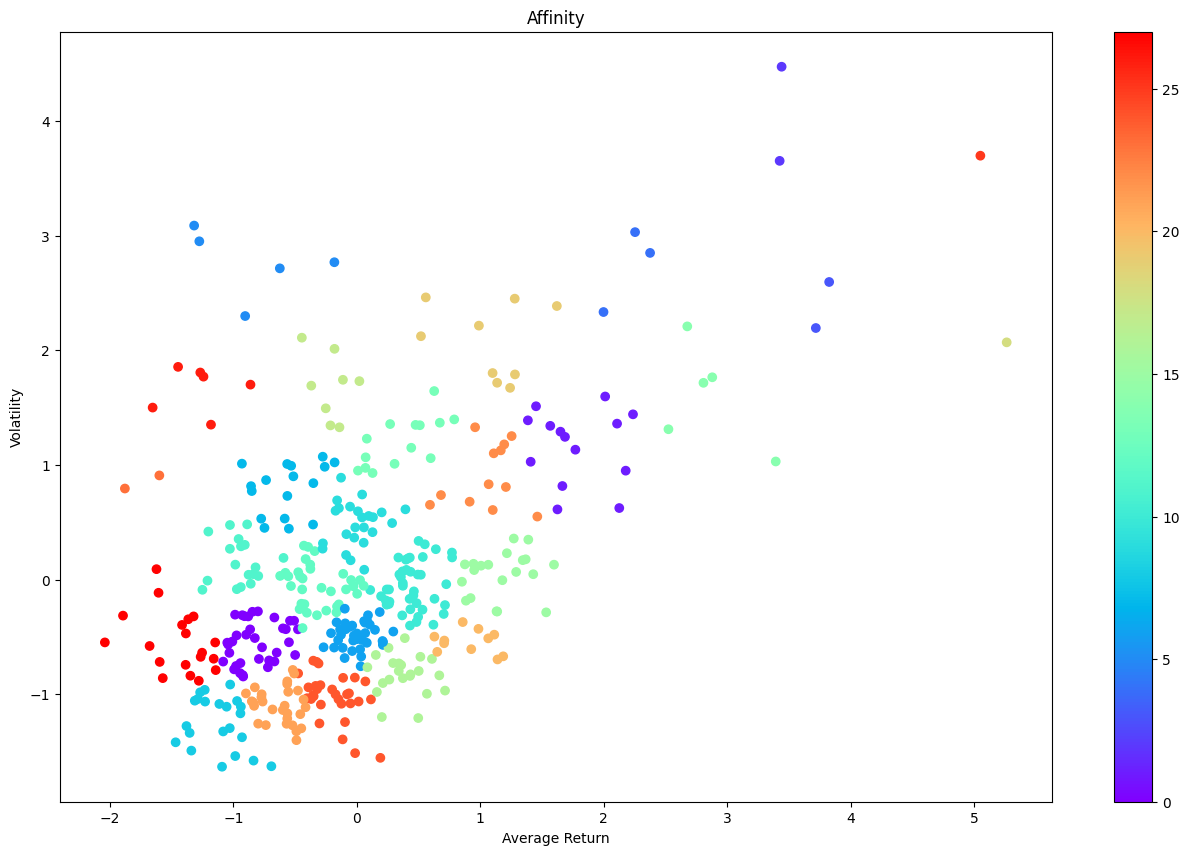

In [110]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels2, 
                     cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

## Cluster Visualisation

In [111]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 28


<Figure size 640x480 with 0 Axes>

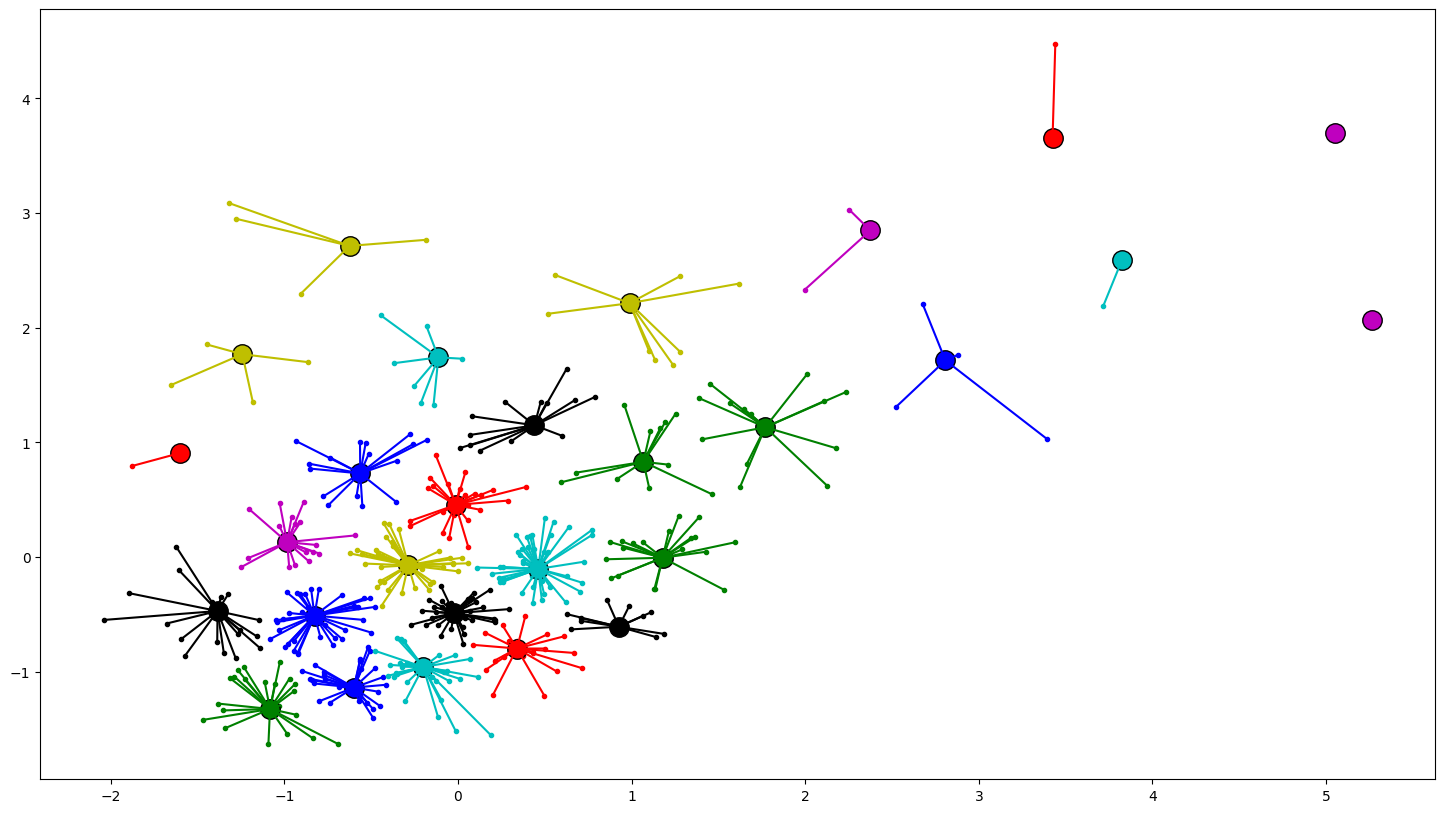

In [112]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp = np.asarray(X)

plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk") # The sequence "bgrcmyk" (blue, green, red, cyan, magenta, yellow, black) 
                                               # is repeated four times

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

## options to proceed from here 
1) centeroid of each cluster
2) choose one stock per cluster
3) Select only largest cluster

In [113]:
cluster_centers_indices

array([  7,  21,  23,  42,  57,  73,  80,  92, 133, 166, 176, 228, 263,
       273, 276, 279, 281, 283, 300, 307, 309, 314, 321, 358, 394, 396,
       423, 441])

In [114]:
len(cluster_centers_indices)

28

In [115]:
### extract out tickets of representative stocks based on cluster centers
representative_tickers =  X.index[cluster_centers_indices].tolist()
print(representative_tickers)


['ADM', 'AMAT', 'AMD', 'AXON', 'BLDR', 'CCL', 'CINF', 'COP', 'ED', 'FITB', 'GLW', 'KIM', 'MET', 'MOH', 'MPWR', 'MSCI', 'MSI', 'MTCH', 'NVDA', 'ON', 'ORLY', 'PEG', 'PHM', 'SLB', 'TRV', 'TSLA', 'WBD', 'ZBH']


In [116]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

In [117]:
from sklearn import metrics

In [118]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.38885821077280003
hc 0.33393781435199144
ap 0.34056301141697326


In [119]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [120]:
# Get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# Let's visualize some clusters
cluster_vis_list = list(counts[(counts < 25) & (counts > 1)].index)[::-1]
cluster_vis_list

[23, 3, 2, 4, 14, 5, 26, 17, 19, 20, 22, 13, 1, 7, 11, 27, 15, 8, 16, 9]

In [121]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 26
Pairs to evaluate: 10568


## Perform Data split for PCA

In [123]:
breakdown =\
    int(len(scaled_dfprices) * 0.75)

X_Train = scaled_dfprices[    : breakdown] # First 75% of the data
X_Test  = scaled_dfprices[breakdown:     ] # Remaining 25% of the data

X_Train_Raw = Daily_Linear_Return[    :breakdown]
X_Test_Raw  = Daily_Linear_Return[breakdown:    ]

In [ ]:
## version 1 - vanilla model of including everything 443 stocks

In [124]:
train_stocks = X_Train[tickers_no_spy] ##443 stocks
test_stocks = X_Test[tickers_no_spy]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [127]:
print(train_stocks.shape[1])

443


In [229]:
## version 2 - use clustered centers

In [128]:
train_stocks_2 = X_Train[representative_tickers]
test_stocks_2 = X_Test[representative_tickers]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [129]:
train_stock_2 = train_stocks_2.dropna()

In [130]:
train_spy.head(4)

Date
2012-06-29         NaN
2012-07-02    0.227062
2012-07-03    0.565025
2012-07-05   -0.483037
Name: SPY, dtype: float64

In [131]:
stock_tickers =\
(
 scaled_dfprices
 .columns
 .values
)

stock_tickers

array(['A', 'AAPL', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
       'ALB', 'ALGN', 'ALL', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP',
       'AMT', 'AMZN', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV',
       'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO',
       'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB',
       'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX',
       'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI',
       'CCL', 'CDNS', 'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL',
       'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL',
       'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX',
       'D', 'DAL', 'DD', 'DE', 'DECK', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DLR', 'DLTR', 'DOC', 'DOV', 'DPZ', 'DRI', 'DTE', 'DU

### PCA portion
- Having found the cluster centroids that drive S&P price, we feed this into PCA
- We run with vanilla (all 443 stocks) as well as with the cluster centroids for comparison

## 1 Vanilla

In [135]:
pca =\
(
    PCA()
    .fit(train_stocks.dropna())

)

In [136]:
def build_ML_portfolio_qf627(df):
    return pd.DataFrame(
        {f"ML Portfolio {i+1}": df.dot(pca.components_[i] / np.sum(np.abs(pca.components_[i]))
                                      )
         for i in range(5)
        },
        index = df.index
    )

In [137]:
ml_portfolio_train = build_ML_portfolio_qf627(X_Train_Raw[tickers_no_spy])

ml_portfolio_test = build_ML_portfolio_qf627(X_Test_Raw[tickers_no_spy])

In [138]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-02,0.003485,0.002811,0.000398,0.002086,-0.001780,0.003012
2012-07-03,0.008448,-0.005386,0.002134,-0.001355,0.006866,0.006593
2012-07-05,-0.002824,0.000119,0.004248,0.002807,-0.002351,-0.004512
2012-07-06,-0.011083,0.005061,-0.006956,-0.000530,-0.004381,-0.009504
2012-07-09,-0.003212,0.002426,-0.000633,-0.000580,-0.000161,-0.001255
...,...,...,...,...,...,...
2022-06-30,-0.005944,0.007362,-0.001339,-0.001724,-0.002563,-0.008124
2022-07-01,0.011841,0.006734,-0.003208,0.001696,-0.002437,0.010576
2022-07-05,-0.004463,-0.006664,0.014592,0.007348,-0.014397,0.001889


In [139]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2022-07-08,-0.003744,-0.000214,0.001057,0.000155,0.002024,-0.000823
2022-07-11,-0.008427,0.007840,-0.004345,-0.004625,-0.001333,-0.011424
2022-07-12,-0.004688,-0.003096,-0.007341,0.001963,-0.007084,-0.008849
2022-07-13,-0.005437,0.000327,0.001627,0.001032,0.003087,-0.005252
2022-07-14,-0.007991,0.003199,0.006210,0.002513,0.000681,-0.002429
...,...,...,...,...,...,...
2025-11-05,0.005634,-0.004873,0.001427,0.000773,0.002020,0.003465
2025-11-06,-0.005874,0.000303,-0.007184,-0.004047,0.002795,-0.010729
2025-11-07,0.009374,0.002844,-0.004010,0.000806,-0.001884,0.000985


In [149]:
def calculate_metrics_pca(ts_returns, periods_per_year=252, starting_capital=100_000):
    """
    Calculate performance metrics for a time series of returns.
    
    Parameters:
    ts_returns: pandas Series (single portfolio) or DataFrame (multiple portfolios)
    periods_per_year: number of periods per year (default 252 for daily)
    starting_capital: initial investment amount
    
    Returns:
    pandas DataFrame with scalar values in each cell, one row per portfolio
    """
    # Handle both Series and DataFrame inputs
    if isinstance(ts_returns, pd.Series):
        ts_returns = pd.DataFrame(ts_returns)
    
    results = []
    
    for column in ts_returns.columns:
        returns = ts_returns[column].dropna()
        
        if len(returns) == 0:
            # Return default values for empty series
            results.append({
                "CAGR": 0.0,
                "Sharpe": 0.0,
                "Max_Drawdown": 0.0,
                "Final_Account_Value": float(starting_capital)
            })
            continue
        
        # Calculate equity curve
        equity = returns.add(1).cumprod()
        equity_dollars = equity * starting_capital
        
        # Calculate time period in years
        if len(equity) > 1:
            years = (equity.index[-1] - equity.index[0]).days / 365.25
        else:
            years = 1.0
        
        n_periods = len(returns)
        n_years = n_periods / periods_per_year
        
        # Get final equity value as scalar
        final_equity = equity.iloc[-1]
        if hasattr(final_equity, 'item'):
            final_equity_scalar = final_equity.item()
        else:
            final_equity_scalar = float(final_equity)
        
        # Annualized return
        if n_years > 0 and final_equity_scalar > 0:
            annualized_return = np.power(final_equity_scalar, (1 / n_years)) - 1
        else:
            annualized_return = 0.0
        
        # Annualized volatility
        annualized_vol = returns.std() * np.sqrt(periods_per_year)
        
        # Handle zero volatility case
        if isinstance(annualized_vol, (int, float, np.floating)):
            annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
        else:
            annualized_vol_safe = annualized_vol.replace(0, np.nan)
        
        # Sharpe ratio
        if pd.notna(annualized_vol_safe) and annualized_vol_safe != 0:
            annualized_sharpe = annualized_return / annualized_vol_safe
        else:
            annualized_sharpe = 0.0
        
        # CAGR
        if years > 0 and final_equity_scalar > 0:
            cagr = final_equity_scalar ** (1 / years) - 1
        else:
            cagr = 0.0
        
        # Maximum drawdown
        rolling_max = equity.cummax()
        drawdown = (equity - rolling_max) / rolling_max
        max_dd = drawdown.min()
        
        # Convert max_dd to scalar if it's a Series
        if hasattr(max_dd, 'item'):
            max_dd_scalar = max_dd.item()
        else:
            max_dd_scalar = float(max_dd)
        
        # Final account value - ensure it's a scalar
        final_val = equity_dollars.iloc[-1]
        if hasattr(final_val, 'item'):
            final_account_value = final_val.item()
        else:
            final_account_value = float(final_val)
        
        results.append({
            "CAGR": float(cagr),
            "Sharpe": float(annualized_sharpe),
            "Max_Drawdown": float(max_dd_scalar),
            "Final_Account_Value": float(final_account_value)
        })
    
    # Create DataFrame with proper index if multiple portfolios
    if len(ts_returns.columns) > 1:
        return pd.DataFrame(results, index=ts_returns.columns)
    else:
        return pd.DataFrame(results)

In [152]:
metrics_train = calculate_metrics_pca(train_all)

In [153]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,17.56%,0.97,-39.37%,"$505,123.35"
ML Portfolio 2,-0.50%,-0.06,-30.90%,"$95,082.19"
ML Portfolio 3,6.79%,0.92,-19.67%,"$193,000.50"
ML Portfolio 4,2.09%,0.39,-14.93%,"$123,049.78"
ML Portfolio 5,1.81%,0.29,-20.38%,"$119,692.27"
SPY,13.18%,0.79,-33.72%,"$345,408.53"


In [156]:
metrics_test = calculate_metrics_pca(test_all)

In [157]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,16.22%,1.01,-17.47%,"$165,335.92"
ML Portfolio 2,-6.66%,-0.79,-21.82%,"$79,400.55"
ML Portfolio 3,1.45%,0.24,-7.91%,"$104,945.50"
ML Portfolio 4,2.23%,0.47,-6.34%,"$107,652.00"
ML Portfolio 5,1.55%,0.27,-9.02%,"$105,286.33"
SPY,19.94%,1.18,-18.76%,"$183,707.81"


# 2) AP - 26 Clustered stocks + PCA

In [158]:
pca =\
(
    PCA()
    .fit(train_stocks_2.dropna())
)

In [159]:
ml_portfolio_train = build_ML_portfolio_qf627(X_Train_Raw[representative_tickers])

ml_portfolio_test = build_ML_portfolio_qf627(X_Test_Raw[representative_tickers])

In [160]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-02,0.002258,-0.004345,-0.002096,0.015347,0.003007,0.003012
2012-07-03,0.011098,0.010280,-0.003696,-0.004511,-0.004589,0.006593
2012-07-05,-0.004321,0.003349,0.005255,0.008937,0.005274,-0.004512
2012-07-06,-0.010453,-0.008731,0.000587,0.003763,0.002917,-0.009504
2012-07-09,-0.001329,-0.000315,0.009269,0.004351,0.027567,-0.001255
...,...,...,...,...,...,...
2022-06-30,-0.008073,-0.008768,0.002912,0.001815,0.003347,-0.008124
2022-07-01,0.005874,-0.017809,0.000013,0.025535,0.006761,0.010576
2022-07-05,-0.002377,0.022225,0.003290,0.022583,0.001170,0.001889


In [161]:
pca_train = train_all['ML Portfolio 1']

In [162]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2022-07-08,-0.002309,0.006615,0.001629,-0.001231,0.002354,-0.000823
2022-07-11,-0.016565,-0.014572,0.005198,-0.003178,0.008816,-0.011424
2022-07-12,-0.001444,-0.002029,-0.007375,0.012390,-0.001321,-0.008849
2022-07-13,-0.004011,0.005260,0.002696,0.000927,0.000164,-0.005252
2022-07-14,-0.010916,0.013396,0.007770,-0.004711,0.000339,-0.002429
...,...,...,...,...,...,...
2025-11-05,-0.000972,0.012590,-0.003558,-0.007600,-0.000432,0.003465
2025-11-06,-0.013499,-0.020603,0.005871,-0.001645,0.006440,-0.010729
2025-11-07,0.004236,-0.008640,0.002779,0.004348,0.006722,0.000985


In [163]:
pca_test = test_all['ML Portfolio 1']

In [164]:
metrics_train = calculate_metrics_pca(train_all)

In [165]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,21.80%,1.00,-44.03%,"$720,331.67"
ML Portfolio 2,15.30%,1.10,-25.40%,"$415,943.34"
ML Portfolio 3,6.70%,0.66,-26.58%,"$191,393.82"
ML Portfolio 4,1.79%,0.17,-31.56%,"$119,477.84"
ML Portfolio 5,-1.86%,-0.20,-32.83%,"$82,823.94"
SPY,13.18%,0.79,-33.72%,"$345,408.53"


In [166]:
metrics_test = calculate_metrics_pca(test_all)

In [167]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,23.16%,1.15,-22.43%,"$200,742.40"
ML Portfolio 2,13.83%,0.86,-17.29%,"$154,254.35"
ML Portfolio 3,2.02%,0.22,-12.90%,"$106,934.36"
ML Portfolio 4,2.49%,0.23,-13.82%,"$108,574.47"
ML Portfolio 5,-10.99%,-0.96,-38.58%,"$67,739.68"
SPY,19.94%,1.18,-18.76%,"$183,707.81"


### Phase 3)  Back testing now with the new feature

In [268]:
pca_train

Date
2012-07-02    0.002258
2012-07-03    0.011098
2012-07-05   -0.004321
2012-07-06   -0.010453
2012-07-09   -0.001329
                ...   
2022-06-30   -0.008073
2022-07-01    0.005874
2022-07-05   -0.002377
2022-07-06   -0.002506
2022-07-07    0.026332
Name: ML Portfolio 1, Length: 2520, dtype: float64

In [269]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973579,95.973579,95.973579
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963384,95.969962,95.973021
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924441,95.955719,95.970794
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088937,96.012071,95.979335
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291091,96.088762,95.991489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,-0.007814,-0.003047,0.142509,-0.014103,0.014531,0.018459,0.041429,672.719046,659.263508,604.438746,676.950233,670.954578,619.155732
2025-11-07,-0.006447,0.001825,0.089874,-0.016393,0.009855,0.013731,0.042320,672.709999,659.847765,604.840321,675.862912,670.955571,619.671297
2025-11-10,-0.000909,0.000532,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227223,676.876929,671.631986,620.285911
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602398,677.990214,672.365406,620.909932


In [270]:
data =\
(
    pd
    .concat([spy_weekly, X, pca_train],
            axis = 1)
    .dropna()
)
data

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1
2012-07-02,-0.017514,-0.001007,0.007940,-0.193175,0.038761,0.043243,0.056034,-0.018575,104.904208,106.371521,100.733483,105.961391,105.417691,103.301850,0.002258
2012-07-03,-0.023936,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454346,105.627688,103.355290,0.011098
2012-07-05,-0.024270,0.007533,0.001804,-0.118925,0.026820,0.040283,0.039299,0.011696,105.595487,106.302843,100.771115,106.768518,105.792501,103.403320,-0.004321
2012-07-06,0.001917,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029220,-0.005915,105.753669,106.257909,100.780360,106.838637,105.880351,103.440642,-0.010453
2012-07-09,0.000812,0.003017,-0.011031,0.067881,-0.005747,0.008758,0.026001,-0.020152,105.902453,106.230448,100.792023,106.871562,105.953859,103.476255,-0.001329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.029822,0.007174,-0.006393,-0.011773,-0.002145,-0.081910,-0.074833,-0.187027,371.023551,390.717617,415.855256,364.231951,373.055850,402.157287,-0.008073
2022-07-01,0.007812,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813437,389.679050,415.691577,364.258648,372.496040,401.781381,0.005874
2022-07-05,-0.002963,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282620,388.632071,415.518325,364.405613,372.016744,401.416063,-0.002377
2022-07-06,-0.011600,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120935,387.546051,415.352920,364.750022,371.647913,401.066649,-0.002506


## calculate orthogonal portfolio

In [271]:
#calculate orthogonal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[['SPY_DT', 'SPY_3DT']], data['ML Portfolio 1'])
residuals = data['ML Portfolio 1'] - lr.predict(data[['SPY_DT', 'SPY_3DT']])
data['ML_Portfolio_Orthogonal'] = residuals

In [272]:
Y =\
(
    data
    .loc[ : , spy_weekly.name]
)

Y

2012-07-02   -0.017514
2012-07-03   -0.023936
2012-07-05   -0.024270
2012-07-06    0.001917
2012-07-09    0.000812
                ...   
2022-06-30    0.029822
2022-07-01    0.007812
2022-07-05   -0.002963
2022-07-06   -0.011600
2022-07-07   -0.028898
Name: SPY_pred, Length: 2380, dtype: float64

In [273]:
X =\
(
    data
    .iloc[ : , 1:]
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043243,0.056034,-0.018575,104.904208,106.371521,100.733483,105.961391,105.417691,103.301850,0.002258,-0.007410
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454346,105.627688,103.355290,0.011098,0.001114
2012-07-05,0.007533,0.001804,-0.118925,0.026820,0.040283,0.039299,0.011696,105.595487,106.302843,100.771115,106.768518,105.792501,103.403320,-0.004321,-0.011179
2012-07-06,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029220,-0.005915,105.753669,106.257909,100.780360,106.838637,105.880351,103.440642,-0.010453,-0.015557
2012-07-09,0.003017,-0.011031,0.067881,-0.005747,0.008758,0.026001,-0.020152,105.902453,106.230448,100.792023,106.871562,105.953859,103.476255,-0.001329,-0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.007174,-0.006393,-0.011773,-0.002145,-0.081910,-0.074833,-0.187027,371.023551,390.717617,415.855256,364.231951,373.055850,402.157287,-0.008073,-0.006995
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813437,389.679050,415.691577,364.258648,372.496040,401.781381,0.005874,0.011456
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282620,388.632071,415.518325,364.405613,372.016744,401.416063,-0.002377,0.001569
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120935,387.546051,415.352920,364.750022,371.647913,401.066649,-0.002506,-0.004563


In [274]:
##try a different subset
X =\
(
    X
    .loc[ : , ~X.columns.str.contains(r"ML Portfolio 1")]
)
X


,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043243,0.056034,-0.018575,104.904208,106.371521,100.733483,105.961391,105.417691,103.301850,-0.007410
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454346,105.627688,103.355290,0.001114
2012-07-05,0.007533,0.001804,-0.118925,0.026820,0.040283,0.039299,0.011696,105.595487,106.302843,100.771115,106.768518,105.792501,103.403320,-0.011179
2012-07-06,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029220,-0.005915,105.753669,106.257909,100.780360,106.838637,105.880351,103.440642,-0.015557
2012-07-09,0.003017,-0.011031,0.067881,-0.005747,0.008758,0.026001,-0.020152,105.902453,106.230448,100.792023,106.871562,105.953859,103.476255,-0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.007174,-0.006393,-0.011773,-0.002145,-0.081910,-0.074833,-0.187027,371.023551,390.717617,415.855256,364.231951,373.055850,402.157287,-0.006995
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813437,389.679050,415.691577,364.258648,372.496040,401.781381,0.011456
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282620,388.632071,415.518325,364.405613,372.016744,401.416063,0.001569
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120935,387.546051,415.352920,364.750022,371.647913,401.066649,-0.004563


In [275]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set)
                )
train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [276]:
Y_train, Y_test =\
(
    Y[0         : train_size],
    Y[train_size:len(Y)     ]
)

In [277]:
X_train, X_test =\
(
    X[0         : train_size],
    X[train_size:len(X)     ]
)

In [278]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [279]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


In [280]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  24.1    0.52         -0.31            504852.31

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  55.18    0.55         -0.36            299911.02

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.81    0.51         -0.55            379102.44

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  14.22    0.87         -0.24            188160.72

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.520 vs BH: 0.510
Test  - Momentum: 0.550 vs BH: 0.870

CAGR (Annualized Return):
Train - Momentum: 24.100 vs BH: 9.810
Test  - Momentum: 55.180 vs BH: 14.220

MAX DRAWDOWN:
Train - Momentum: -0.310 vs BH: -0.550
Test  - Momentum: -0.360 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $504,852.31 vs BH: $379,102.44
Test  - Momentum: $299,911.02 vs BH: $188,160.72

OUTPERFORMANC